In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sb
%matplotlib inline

In [2]:
#download data about unicorn companies
dtypes={'Continent':'category','country':'category','industry':'category'}
unicorn_df=pd.read_csv(os.path.join("Unicorn+Companies","Unicorn_Companies.csv"),na_values=["''"],keep_default_na=True,
                      parse_dates=["Date Joined","Year Founded"],dtype=dtypes)
unicorn_df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
#check the info about the df 
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   category      
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: category(1), datetime64[ns](2), object(7)
memory usage: 76.9+ KB


In [4]:
# check the columns to see if there are outliers or bad values
# check for years in the sane range or not

start,end=unicorn_df["Year Founded"].min(),unicorn_df["Year Founded"].max()
unicorn_df["Year Founded"].between(start,end,"both").all()


True

In [5]:
start,end=unicorn_df["Date Joined"].min() , unicorn_df["Date Joined"].max()
date_joined=unicorn_df["Date Joined"].between(start,end,"both")
date_joined.all()




True

In [6]:
unicorn_df["Industry"].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

In [7]:
# 2 similar values for artificial intelligence remove one
unicorn_df.loc[unicorn_df["Industry"]=="Artificial Intelligence","Industry"]="Artificial intelligence"

In [8]:
unicorn_df["Continent"].unique()

['Asia', 'North America', 'Europe', 'Oceania', 'South America', 'Africa']
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [9]:
len(unicorn_df[unicorn_df["City"]==""])

0

In [10]:
unicorn_df["Country"].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Bahamas', 'India', 'Indonesia', 'Turkey', 'Estonia', 'Germany',
       'Hong Kong', 'South Korea', 'Mexico', 'Canada', 'Netherlands',
       'France', 'Finland', 'Israel', 'Lithuania', 'Denmark', 'Belgium',
       'Colombia', 'Brazil', 'Singapore', 'Austria', 'Ireland',
       'United Arab Emirates', 'Switzerland', 'Vietnam', 'South Africa',
       'Thailand', 'Norway', 'Chile', 'Argentina', 'Bermuda', 'Japan',
       'Spain', 'Malaysia', 'Senegal', 'Philippines', 'Luxembourg',
       'Nigeria', 'Czech Republic', 'Croatia', 'Italy'], dtype=object)

In [11]:
unicorn_df["Funding"].min(),unicorn_df["Funding"].max()

('$0M', 'Unknown')

In [12]:
unicorn_df["Funding"].unique()

array(['$8B', '$7B', '$2B', '$4B', '$572M', '$3B', '$14B', '$5B', '$918M',
       '$476M', '$770M', '$979M', '$721M', '$490M', '$734M', '$427M',
       '$400M', '$1B', '$799M', '$765M', '$800M', '$376M', '$558M',
       '$294M', '$564M', '$333M', '$691M', '$343M', '$497M', '$71M',
       '$679M', '$775M', '$105M', '$742M', '$607M', '$549M', '$660M',
       '$820M', '$297M', '$922M', '$863M', '$447M', '$844M', '$603M',
       '$583M', '$912M', '$920M', '$849M', '$424M', '$645M', '$802M',
       '$629M', '$448M', '$928M', '$815M', '$728M', '$433M', '$891M',
       '$524M', '$803M', '$415M', '$587M', '$826M', '$910M', '$412M',
       '$405M', '$729M', '$600M', '$869M', '$187M', '$943M', '$514M',
       '$492M', '$644M', '$562M', '$286M', '$559M', '$647M', '$567M',
       '$428M', '$996M', '$596M', '$426M', '$462M', '$824M', '$926M',
       '$755M', '$633M', '$599M', '$371M', '$425M', '$761M', '$903M',
       '$704M', '$503M', '$655M', '$263M', '$216M', '$128M', '$776M',
       '$119M', '$

In [13]:
# first we need to convert it to numbers and we will deal with unknown value later
def remove_funding_non_numeric(x):
    if x=="Unknown":
        return "0"
    s=x[1:]
    if s[-1]=="M":
        # millions
        return s[:-1]+"0"*6
    # billions
    return s[:-1]+"0"*9
unicorn_df["Funding"]=unicorn_df["Funding"].map(remove_funding_non_numeric)
unicorn_df["Funding"].unique()

array(['8000000000', '7000000000', '2000000000', '4000000000',
       '572000000', '3000000000', '14000000000', '5000000000',
       '918000000', '476000000', '770000000', '979000000', '721000000',
       '490000000', '734000000', '427000000', '400000000', '1000000000',
       '799000000', '765000000', '800000000', '376000000', '558000000',
       '294000000', '564000000', '333000000', '691000000', '343000000',
       '497000000', '71000000', '679000000', '775000000', '105000000',
       '742000000', '607000000', '549000000', '660000000', '820000000',
       '297000000', '922000000', '863000000', '447000000', '844000000',
       '603000000', '583000000', '912000000', '920000000', '849000000',
       '424000000', '645000000', '802000000', '629000000', '448000000',
       '928000000', '815000000', '728000000', '433000000', '891000000',
       '524000000', '803000000', '415000000', '587000000', '826000000',
       '910000000', '412000000', '405000000', '729000000', '600000000',
       '86

In [14]:
unicorn_df["Funding"]=unicorn_df["Funding"].astype("int64")
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   category      
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   int64         
 9   Select Investors  1073 non-null   object        
dtypes: category(1), datetime64[ns](2), int64(1), object(6)
memory usage: 76.9+ KB


In [15]:
unicorn_df["Funding"].min(),unicorn_df["Funding"].max()

(0, 14000000000)

In [16]:
def general_median(row,col):
    global unicorn_df
    country=row["Country"]
    industry=row["Industry"]
    country_col=unicorn_df.loc[unicorn_df["Country"]==row["Country"],col]
    country_median=np.median(country_col[country_col > 0])
    industry_col=unicorn_df.loc[unicorn_df["Industry"]==row["Industry"],col]
    industry_median=np.median(industry_col[industry_col != 0])
    new_val= np.int64(np.median([country_median,industry_median]))

    return new_val
    


In [17]:

unicorn_df["Funding"]=unicorn_df.apply(lambda row: row["Funding"] if row["Funding"]>0 else \
                                       general_median(row,"Funding"),axis=1)


In [18]:
unicorn_df["Funding"].min()

1000000

In [19]:
min_val,max_val=unicorn_df["Valuation"].min(),unicorn_df["Valuation"].max()
min_val,max_val

('$100B', '$9B')

In [20]:
unicorn_df["Valuation"].unique()

array(['$180B', '$100B', '$95B', '$46B', '$40B', '$39B', '$38B', '$33B',
       '$32B', '$27B', '$25B', '$22B', '$20B', '$18B', '$17B', '$15B',
       '$14B', '$13B', '$12B', '$11B', '$10B', '$9B', '$8B', '$7B', '$6B',
       '$5B', '$4B', '$3B', '$2B', '$1B'], dtype=object)

In [21]:
unicorn_df["Valuation"]=unicorn_df["Valuation"].map(remove_funding_non_numeric)
unicorn_df["Valuation"].unique()

array(['180000000000', '100000000000', '95000000000', '46000000000',
       '40000000000', '39000000000', '38000000000', '33000000000',
       '32000000000', '27000000000', '25000000000', '22000000000',
       '20000000000', '18000000000', '17000000000', '15000000000',
       '14000000000', '13000000000', '12000000000', '11000000000',
       '10000000000', '9000000000', '8000000000', '7000000000',
       '6000000000', '5000000000', '4000000000', '3000000000',
       '2000000000', '1000000000'], dtype=object)

In [22]:
unicorn_df["Valuation"]=unicorn_df["Valuation"].astype("int64")
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   int64         
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   category      
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   int64         
 9   Select Investors  1073 non-null   object        
dtypes: category(1), datetime64[ns](2), int64(2), object(5)
memory usage: 76.9+ KB


In [23]:
unicorn_df["Select Investors"]=unicorn_df["Select Investors"].map(lambda x : "No Investors" if pd.isna(x) else x)
unicorn_df["City"]=unicorn_df["City"].map(lambda x: "Not Known City" if pd.isna(x) else x)


In [24]:
unicorn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   int64         
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1074 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   category      
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   int64         
 9   Select Investors  1074 non-null   object        
dtypes: category(1), datetime64[ns](2), int64(2), object(5)
memory usage: 76.9+ KB


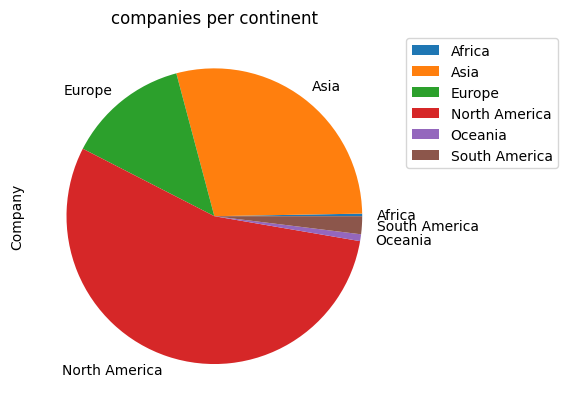

In [25]:
companies_per_cont=unicorn_df.groupby("Continent")
#,(ax1,ax2)=plt.subplots(1,2,figsize=(14,6))
xs=np.arange(len(companies_per_cont.count()))
count=companies_per_cont.count()
count.plot(kind="pie",y="Company")
plt.title("companies per continent")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))





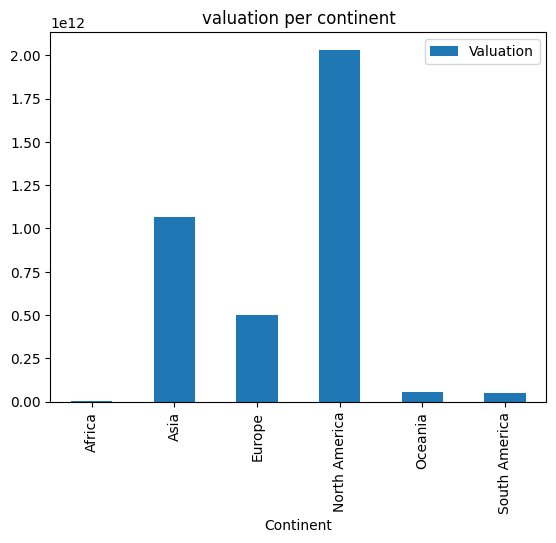

In [26]:
continent_valuation_sum=companies_per_cont["Valuation"].sum()
continent_valuation_sum.plot(kind="bar",y="Valuation")
plt.title("valuation per continent")
plt.legend()


<Axes: xlabel='Continent'>

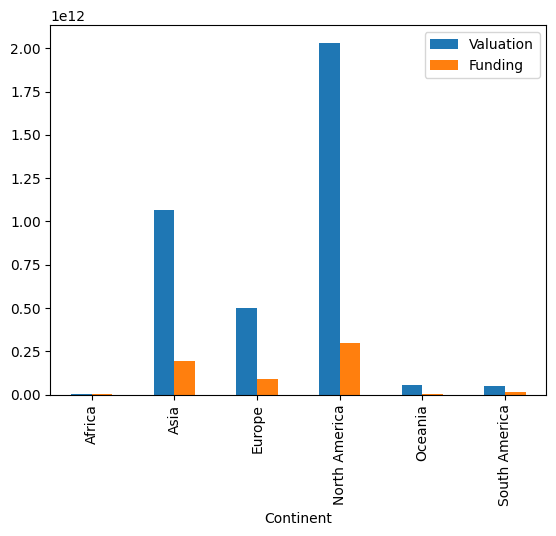

In [27]:
continent_funding_sum=companies_per_cont[["Valuation","Funding"]].sum()
continent_funding_sum.plot(kind="bar")

Text(0, 0.5, 'total funding by year')

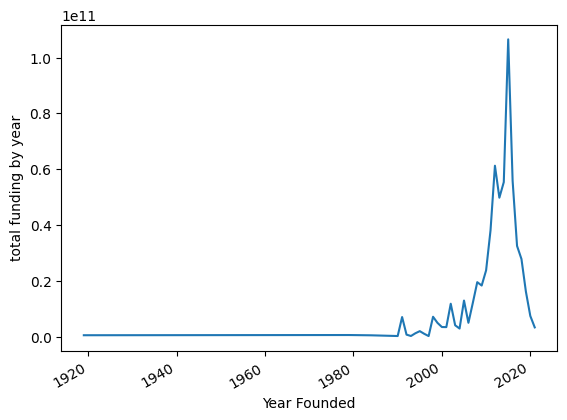

In [28]:
companies_by_founded=unicorn_df.groupby("Year Founded")
funding_by_years=companies_by_founded["Funding"].sum()
scaler=1000000
funding_by_years.plot(y=funding_by_years//scaler)
plt.ylabel("total funding by year")



<Axes: xlabel='Continent', ylabel='years when each contint was funded'>

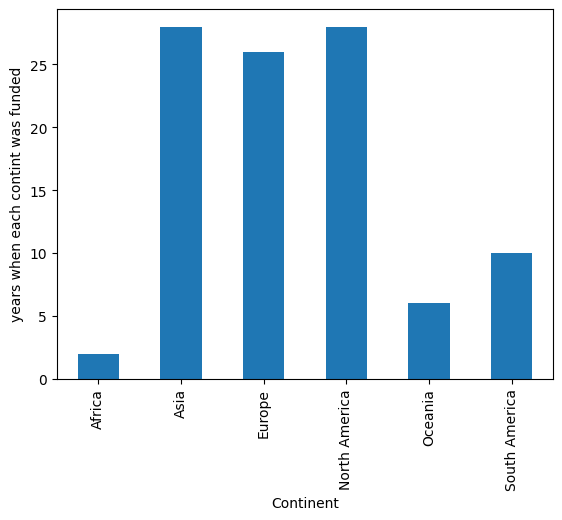

In [29]:
years_per_continent=companies_per_cont["Year Founded"].unique()
years_per_continent=years_per_continent.map(len)
plt.ylabel("years when each contint was funded")
years_per_continent.plot(kind="bar")


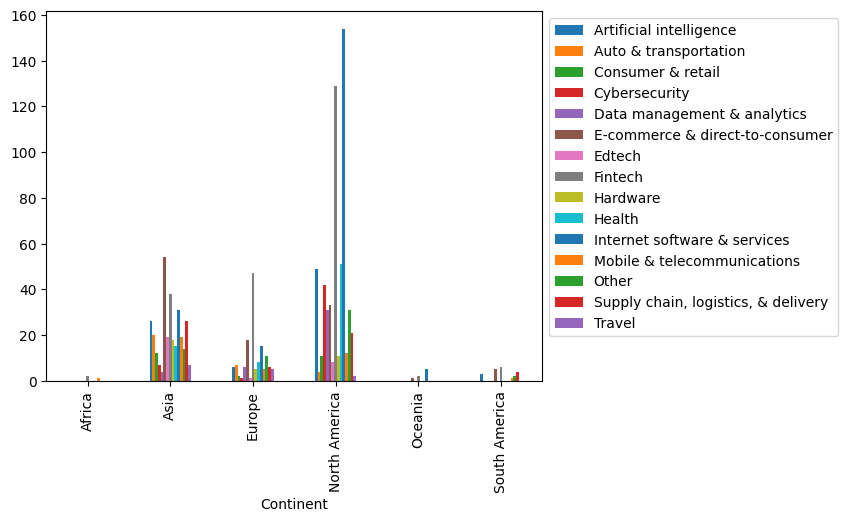

In [30]:
industries_per_cont=companies_per_cont["Industry"].value_counts()
industries_per_cont.unstack().plot(kind="bar")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))

In [31]:
companies_per_industry=unicorn_df.groupby("Industry")

<Axes: ylabel='Funding'>

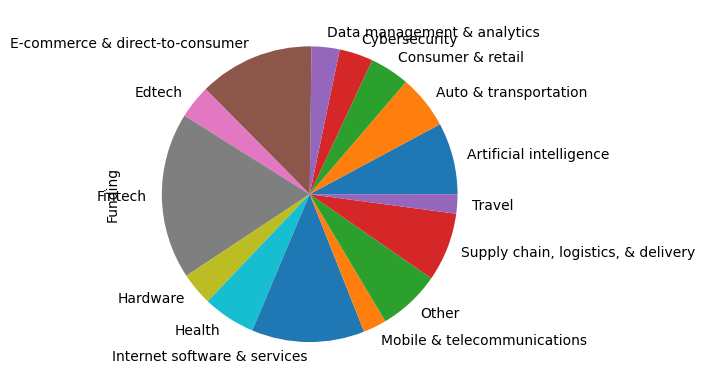

In [32]:
funding_per_industry=companies_per_industry["Funding"].sum()
funding_per_industry.plot(kind="pie")


<Axes: xlabel='Industry'>

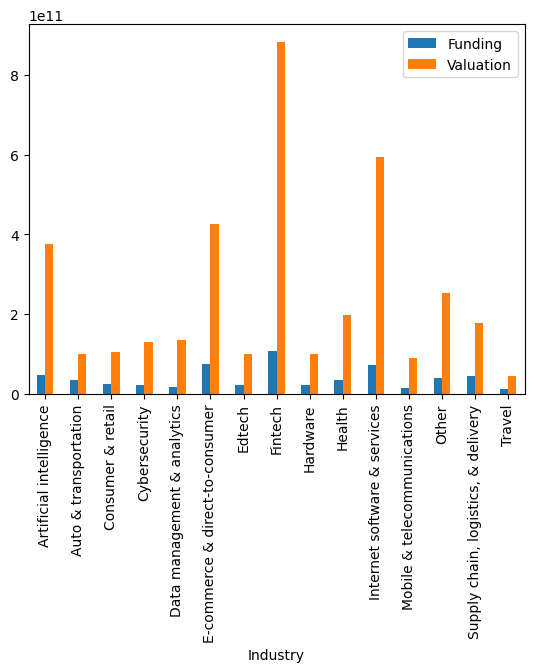

In [33]:
companies_per_industry[["Funding","Valuation"]].sum().plot(kind="bar")

In [34]:
companies_per_country=unicorn_df.groupby("Country")

Text(0.5, 1.0, 'top countries got funded')

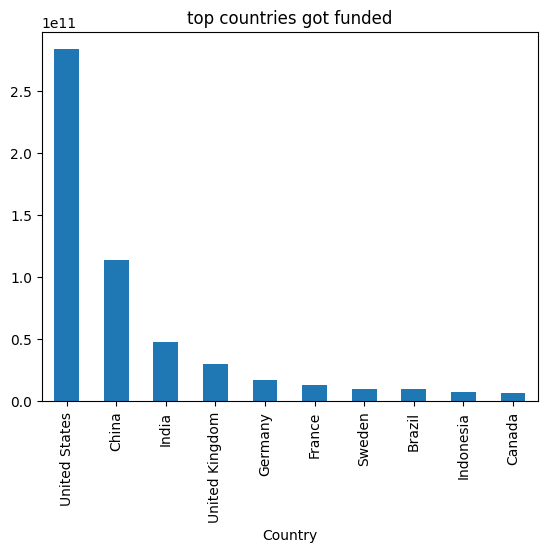

In [35]:
companies_per_country["Funding"].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("top countries got funded")

<Axes: xlabel='Country'>

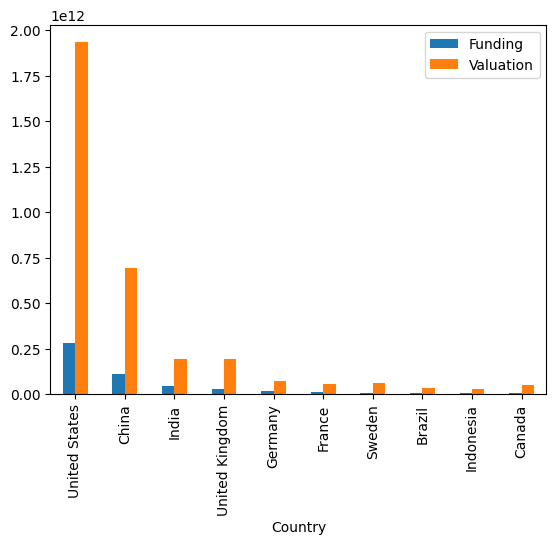

In [36]:
top_countries=companies_per_country[["Funding","Valuation"]].sum()
top_countries.sort_values(by=["Funding","Valuation"],ascending=[False,False])[:10].plot(kind="bar")

Text(0.5, 1.0, 'unicorn fields in asia')

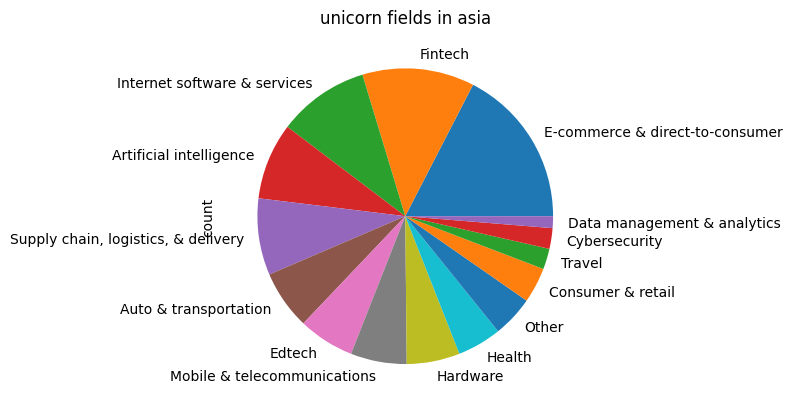

In [37]:
companies_per_cont.get_group("Asia")["Industry"].value_counts().plot(kind="pie")
plt.title("unicorn fields in asia")

<Axes: xlabel='Country'>

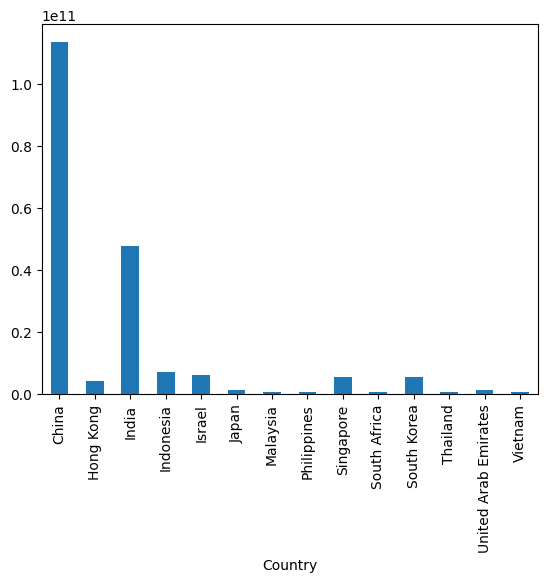

In [38]:
asian_countries=companies_per_cont.get_group("Asia")[["Country","Funding"]].groupby("Country")
asian_countries["Funding"].sum().plot(kind="bar")

Text(0.5, 1.0, 'most valued company per continent')

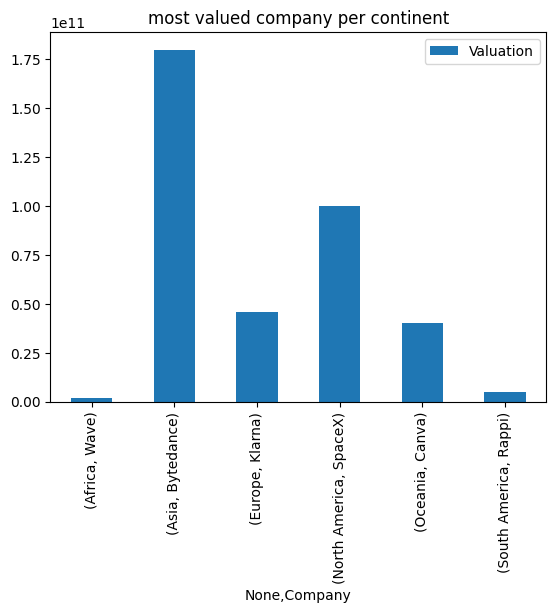

In [39]:
c=companies_per_cont.apply(lambda x:x.sort_values("Valuation",ascending=False)[:1][["Company","Valuation"]])
c.index=[x[0] for x in c.index]
c.set_index("Company",inplace=True,append=True)
c.plot(kind="bar")
plt.title("most valued company per continent")

Text(0.5, 1.0, 'the field with most companies per continent')

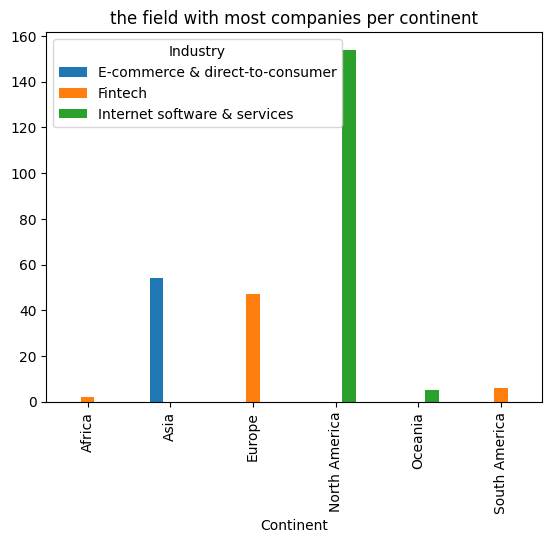

In [40]:
# see which industry in each continent has the 
#biggest number of companies
top_industry_per_cont=companies_per_cont.apply(lambda x : x["Industry"].value_counts().sort_values(ascending=False)[:1])
top_industry_per_cont.unstack().plot(kind="bar")
plt.title("the field with most companies per continent")

<Axes: xlabel='Continent'>

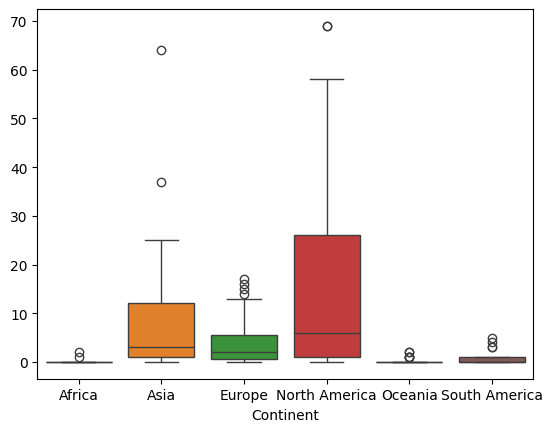

In [41]:
unicorn_per_year=unicorn_df.groupby(unicorn_df["Year Founded"].dt.year)
continent_yearly=unicorn_per_year["Continent"].value_counts().unstack()
sb.boxplot(data=continent_yearly)





In [42]:
pivot=unicorn_df.pivot_table(values="Funding",index="Country",columns="Industry",aggfunc="sum",
                            margins=True,fill_value=0)
pivot.sort_values(by="All",ascending=False)[:10]

Industry,Artificial intelligence,Auto & transportation,Consumer & retail,Cybersecurity,Data management & analytics,E-commerce & direct-to-consumer,Edtech,Fintech,Hardware,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel,All
Country,,,,,,,,,,,,,,,,
All,46802000000,35074000000,25878750000,21932000000,18325250000,75300000000,21875000000,108731250000,21385000000,34427000000,73604000000,15233250000,40756750000,44798500000,12626000000,596748750000
United States,22795000000,5106000000,19611750000,17361000000,14416250000,18691000000,4058000000,50383000000,7146000000,23534000000,51725000000,5661000000,27865750000,14370500000,912000000,283636250000
China,18245000000,20365000000,4745000000,252000000,404000000,25993000000,10525000000,2372250000,7710000000,5531000000,4330000000,4702250000,1216000000,5314000000,1830000000,113534500000
India,0,4761000000,0,0,685000000,9208000000,6032000000,6669000000,0,842000000,6964000000,221000000,674000000,8607000000,3000000000,47663000000
United Kingdom,1094000000,828000000,233000000,0,310000000,538000000,0,18212000000,5000000000,975000000,1000000000,202000000,1458000000,311000000,0,30161000000
Germany,0,1599000000,167000000,0,1000000000,3566000000,0,4632000000,240000000,483000000,1468000000,0,1150000000,933000000,1639000000,16877000000
France,838000000,449000000,0,0,0,4972000000,0,1971000000,916000000,1047000000,1344000000,0,1910000000,0,0,13447000000
Sweden,0,151000000,0,0,0,0,0,4000000000,0,569000000,509000000,0,4000000000,0,516000000,9745000000
Brazil,237000000,0,0,0,0,2827000000,0,4349000000,0,0,0,588000000,180000000,1489000000,0,9670000000


In [43]:
unicorn_df["Select Investors"]=unicorn_df["Select Investors"].str.split(",")
unicorn_df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180000000000,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8000000000,"[Sequoia Capital China, SIG Asia Investments,..."
1,SpaceX,100000000000,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7000000000,"[Founders Fund, Draper Fisher Jurvetson, Rot..."
2,SHEIN,100000000000,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2000000000,"[Tiger Global Management, Sequoia Capital Chi..."
3,Stripe,95000000000,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2000000000,"[Khosla Ventures, LowercaseCapital, capitalG]"
4,Klarna,46000000000,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4000000000,"[Institutional Venture Partners, Sequoia Capi..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1000000000,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012-01-01,379000000,"[K2 Ventures, Matrix Partners China, IDG Cap..."
1070,Zhuan Zhuan,1000000000,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015-01-01,990000000,"[58.com, Tencent Holdings]"
1071,Zihaiguo,1000000000,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018-01-01,80000000,"[Xingwang Investment Management, China Capita..."
1072,Zopa,1000000000,2021-10-19,Fintech,London,United Kingdom,Europe,2005-01-01,792000000,"[IAG Capital Partners, Augmentum Fintech, No..."


In [44]:
def trim_row(row):
    
    x=lambda r: "" if r is None else r.strip()
    return list(map(x,row))
unicorn_df["Select Investors"]=unicorn_df["Select Investors"].map(trim_row)
unicorn_df["Select Investors"]


0       [Sequoia Capital China, SIG Asia Investments, ...
1       [Founders Fund, Draper Fisher Jurvetson, Rothe...
2       [Tiger Global Management, Sequoia Capital Chin...
3           [Khosla Ventures, LowercaseCapital, capitalG]
4       [Institutional Venture Partners, Sequoia Capit...
                              ...                        
1069    [K2 Ventures, Matrix Partners China, IDG Capital]
1070                           [58.com, Tencent Holdings]
1071    [Xingwang Investment Management, China Capital...
1072    [IAG Capital Partners, Augmentum Fintech, Nort...
1073    [Novator Partners, True, Causeway Media Partners]
Name: Select Investors, Length: 1074, dtype: object

In [45]:
# to analyse investors we will move to long format with each investor on its cell
investors_df=unicorn_df["Select Investors"].apply(pd.Series)\
.merge(unicorn_df,left_index=True,right_index=True)\
.drop(["Select Investors"],axis=1)\
.melt(id_vars=["Company","Country","Continent","Industry","Funding","Valuation"],value_name="Investor",
     value_vars=[0,1,2,3])\
                 .dropna(subset="Investor").drop("variable",axis=1)
investors_df=investors_df.reset_index().drop("index",axis=1)
investors_df

,Company,Country,Continent,Industry,Funding,Valuation,Investor
0,Bytedance,China,Asia,Artificial intelligence,8000000000,180000000000,Sequoia Capital China
1,SpaceX,United States,North America,Other,7000000000,100000000000,Founders Fund
2,SHEIN,China,Asia,E-commerce & direct-to-consumer,2000000000,100000000000,Tiger Global Management
3,Stripe,United States,North America,Fintech,2000000000,95000000000,Khosla Ventures
4,Klarna,Sweden,Europe,Fintech,4000000000,46000000000,Institutional Venture Partners
...,...,...,...,...,...,...,...
3049,Rappi,Colombia,South America,"Supply chain, logistics, & delivery",2000000000,5000000000,Redpoint e.ventures
3050,Yixia,China,Asia,Mobile & telecommunications,775000000,3000000000,Redpoint Ventures
3051,Lightricks,Israel,Asia,Artificial intelligence,305000000,2000000000,Goldman Sachs
3052,Evidation,United States,North America,Health,259000000,1000000000,McKesson Ventures


In [63]:
investors_industry=investors_df.groupby("Industry")
agg=[info.sort_values(by="Valuation",ascending=False)[:10] for _,info in investors_industry]
agg=pd.concat(agg)
agg[agg["Country"]=="China"]["Investor"].value_counts()

Investor
Sequoia Capital China           5
Tencent Holdings                3
IDG Capital                     2
ZhenFund                        2
Tiger Global Management         2
GGV Capital                     2
Tencent                         1
Oriza Equity Investment         1
Alibaba Group                   1
Sequoia Capital                 1
Accel Partners                  1
Coatue Management               1
Xiang He Capital                1
Warbug Pincus                   1
Shunwei Capital Partners        1
Sina Weibo                      1
Hillhouse Capital Management    1
Yunfeng Capital                 1
Longfor Capitalm                1
Gaorong Capital                 1
Qualcomm Ventures               1
Legend Capital                  1
LTW Capital                     1
SIG Asia Investments            1
Softbank Group                  1
Blue Lake Capital               1
Name: count, dtype: int64